<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Decision Trees
 
_Author: Joseph Nelson (DC)_

*Adapted from Chapter 8 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) and Chapter 6 of [Hands-On Machine Learning](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781491962282/?arorpq)*

---

## Learning Objectives

Students will be able to:

- Explain how a decision tree is created.
- Build a decision tree model in scikit-learn.
- Tune a decision tree model and explain how tuning impacts the model.
- Interpret a tree diagram.
- Describe the key differences between regression and classification trees.
- Decide whether or not a decision tree is an appropriate model for a given problem.

## Lesson Guide

- [Introduction](#introduction)

- [Classification Trees](#part-two)
    - [Splitting Criteria for Classification Trees](#splitting-criteria)
    - [Building a Classification Tree in `scikit-learn`](#sklearn-ctree)
    
    
- [Regression Trees](#part-one)
    - [Group Exercise](#group-exercise)
    - [Choosing the Ideal Cutpoint for a Given Feature](#cutpoint-demo)
    - [Building a Regression Tree in `scikit-learn`](#sklearn-tree)
    - [Tuning a Regression Tree](#tuning-tree)
    - [Making Predictions for the Testing Data](#testing-preds)


- [Summary: Comparing Decision Trees With Other Models](#part-three)

<a id="introduction"></a>
## Introduction

In this lesson, we will be exploring **Decision Trees**. These are non-parametric models capable of fitting complex datasets and can be used both for regression or classification. 

Decision Trees are also the fundamental components of **Random Forest** which are among the most powerful Machine Learning algorithms available today.

You are likely very familiar with decision trees already! For example, take this graphic from the New York Times. It explains how to predict whether Barack Obama or Hillary Clinton will win the Democratic primary in a particular county in 2008. At the same time, it informs which features might be most important to predict an Obama or Clinton win:

![Obama-Clinton decision tree](assets/obama_clinton_tree.jpg)


### Why are we learning about decision trees?

- They can be applied to both regression and classification problems.
- They are easy to explain to others (interpretable).
- They are very popular among data scientists.
- They are the basis for more sophisticated models.
- They have a different way of "thinking" than the other models we have studied.

## Classification Trees

To understand how Decision Trees work, let's take a look at a toy example (slides).

<a id="splitting-criteria"></a>
## Splitting Criteria for Classification Trees

Common options for the splitting criteria:

- **Classification error rate:** The fraction of training observations in a region that don't belong to the most common class.
- **Gini index (or Gini impurity):** The measure of total variance across classes in a region.

Pretend we are predicting whether or not someone will buy an iPhone or an Android:

|Phone|Gender|Age|
|---|---|---|
|iPhone|F|<30|
|iPhone|F|<30|
|iPhone|F|<30|
|iPhone|F|<30|
|iPhone|F|31+|
|iPhone|F|31+|
|iPhone|F|31+|
|iPhone|F|31+|
|iPhone|M|31+|
|iPhone|M|31+|
|Android|F|<30|
|Android|F|<30|
|Android|F|<30|
|Android|M|<30|
|Android|M|<30|
|Android|M|<30|
|Android|M|<30|
|Android|M|<30|
|Android|M|31+|
|Android|M|31+|
|Android|M|31+|
|Android|M|31+|
|Android|M|31+|
|Android|M|31+|
|Android|M|31+|

### Classification Error Rate

- At a particular node, there are **25 observations** (phone buyers) of whom **10 bought iPhones and 15 bought Androids**.
- As the majority class is **Android**, that's our prediction for all 25 observations, and thus the classification error rate is **10/25 = 40%**.

Our goal in making splits is to **reduce the classification error rate**. Let's try splitting on gender:

- **Males:** Two iPhones and 12 Androids, thus the predicted class is Android.
- **Females:** Eight iPhones and three Androids, thus the predicted class is iPhone.
- Classification error rate after this split would be **5/25 = 20%**.

Compare that with a split on age:

- **30 or younger:** Four iPhones and eight Androids, thus the predicted class is Android.
- **31 or older:** Six iPhones and seven Androids, thus the predicted class is Android.
- Classification error rate after this split would be **10/25 = 40%**.

The decision tree algorithm will try **every possible split across all features** and choose the one that **reduces the error rate the most.**

### Gini Index

_Formula for calculating Gini imputity:_
$$
G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2
$$
_where $i$ is the number of the node, $k$ is a class and $p_{i,k}$ is the ratio of class $k$ instances in the $i$ node._

**Example with phone buyers:** Calculate the Gini index before making a split:

$$1 - \left(\frac {iPhone} {Total}\right)^2 - \left(\frac {Android} {Total}\right)^2 = 1 - \left(\frac {10} {25}\right)^2 - \left(\frac {15} {25}\right)^2 = 0.48$$

- The **maximum value** of the Gini index is 0.5 and occurs when the classes are perfectly balanced in a node.
- The **minimum value** of the Gini index is 0 and occurs when there is only one class represented in a node.
- A node with a lower Gini index is said to be more "pure."

Evaluating the split on **gender** using the Gini index:

$$\text{Males: } 1 - \left(\frac {2} {14}\right)^2 - \left(\frac {12} {14}\right)^2 = 0.24$$
$$\text{Females: } 1 - \left(\frac {8} {11}\right)^2 - \left(\frac {3} {11}\right)^2 = 0.40$$
$$\text{Weighted Average: } 0.24 \left(\frac {14} {25}\right) + 0.40 \left(\frac {11} {25}\right) = 0.31$$

Evaluating the split on **age** using the Gini index:

$$\text{30 or younger: } 1 - \left(\frac {4} {12}\right)^2 - \left(\frac {8} {12}\right)^2 = 0.44$$
$$\text{31 or older: } 1 - \left(\frac {6} {13}\right)^2 - \left(\frac {7} {13}\right)^2 = 0.50$$
$$\text{Weighted Average: } 0.44 \left(\frac {12} {25}\right) + 0.50 \left(\frac {13} {25}\right) = 0.47$$

Again, the decision tree algorithm will try **every possible split** and will choose the one that **reduces the Gini index (and thus increases the "node purity") the most**.

You can think of this as each split increasing the accuracy of predictions. If there is some error at a node, then splitting at that node will result in two nodes with a higher average "node purity" than the original. So, we ensure continually better fits to the training data by continually splitting nodes.

### Comparing Classification Error Rate and Gini Index

- Gini index is generally preferred because it will make splits that **increase node purity**, even if that split does not change the classification error rate.
- Node purity is important because we're interested in the **class proportions** in each region, as that's how we calculate the **predicted probability** of each class.
- scikit-learn's default splitting criteria for classification trees is Gini index.

**Note:** There is another common splitting criteria called **cross-entropy**. It's numerically similar to Gini index but slower to compute. So, it's not as popular as Gini index.

<a id="sklearn-ctree"></a>
## Building a Classification Tree in `scikit-learn`

We'll build a classification tree using the Titanic survival data set:

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

In [2]:
# Read in the data.
path = './data/titanic.csv'
titanic = pd.read_csv(path)

# Encode female as 0 and male as 1.
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})

# Fill in the missing values for age with the median age.
titanic.Age.fillna(titanic.Age.median(), inplace=True)

# Create a DataFrame of dummy variables for Embarked.
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame.
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# Print the updated DataFrame.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1


- **Survived:** 0=died, 1=survived (response variable)
- **Pclass:** 1=first class, 2=second class, 3=third class
    - What will happen if the tree splits on this feature?
- **Sex:** 0=female, 1=male
- **Age:** Numeric value
- **Embarked:** C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
# Define X and y.
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']

X = titanic[feature_cols]
y = titanic.Survived

In [4]:
# Fit a classification tree with max_depth=3 on all data.
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=1)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

### Creating a Tree Diagram

To create a tree diagram, we will use the Graphviz library for displaying graph data structures. 

Surprisingly, every tree is just a graph in disguise! A graph is a tree only if there is exactly one vertex with no incoming edge (the root), while all other vertices have exactly one incoming edge (representing its parent).

In [5]:
from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_clf, filled=True, rounded=True,
                           class_names=['Died', 'Survived'],
                           feature_names=feature_cols,
                           out_file=None
)

graph = graph_from_dot_data(dot_data) 
graph.write_png('./assets/tree_titanic.png') 

ModuleNotFoundError: No module named 'pydotplus'

In [6]:
# Alternatively, you can create a graphviz object and save it as a .dot file.

#from sklearn.tree import export_graphviz
#export_graphviz(tree_clf, out_file='./assets/tree_titanic.dot', feature_names=feature_cols)

# At the command line, run this to convert to PNG:
#   dot -Tpng tree_titanic.dot -o tree_titanic.png

![](assets/tree_titanic.png)

Reading the internal nodes:

- **rule:** Rule used to split that node (go left if true, go right if false).
- **samples:** Number of observations in that node before splitting.
- **value:** Number of observations of each class before splitting.
- **gini:** Node's Gini impurity calculated by comparing the actual response values in that node against the predicted class. A node is "pure" if all training instances it applies to belong to the same class.

Reading the leaves:

- **samples:** Number of observations in that node.
- **value:** Number of observations of each class.
- **class:** Predicted class.

Notice the split in the bottom right; the **same class** is predicted in both of its leaves. That split didn't affect the **classification error rate**, although it did increase the **node purity**. This is important because it increases the accuracy of our predicted probabilities.

A useful side effect of measures such as the Gini index is that they can be used to give some indication of feature importance:

In [7]:
# Compute the feature importances (the Gini index at each node).

pd.DataFrame({'feature':feature_cols, 'importance':tree_clf.feature_importances_})\
.sort_values(by='importance', ascending=False)

,feature,importance
1,Sex,0.655584
0,Pclass,0.242664
2,Age,0.064494
4,Embarked_S,0.037258
3,Embarked_Q,0.000000


<a id="part-one"></a>
## Regression Trees

In this section, we will make decision trees that predict numeric data. Instead of returning a class, we will return a single numeric value for each set of conditions.

|Regression Trees|Classification Trees|
|---|---|
|Predict a continuous response.|Predict a categorical response.|
|Predict using mean response of each leaf.|Predict using most commonly occurring class of each leaf.|
|Splits are chosen to minimize MSE.|Splits are chosen to minimize Gini index (discussed below).|

For example, the following tree predicts prices on Sydney Airbnb listings in 2018.

In [9]:
path = './data/sydney-airbnb.csv'
airbnb = pd.read_csv(path) 

# Fill missing values with zeros
airbnb.fillna(0, inplace=True)
airbnb.isnull().sum()

neighbourhood        0
latitude             0
longitude            0
room_type            0
minimum_nights       0
number_of_reviews    0
reviews_per_month    0
availability_365     0
price                0
dtype: int64

###### Check the distribution of the response variable

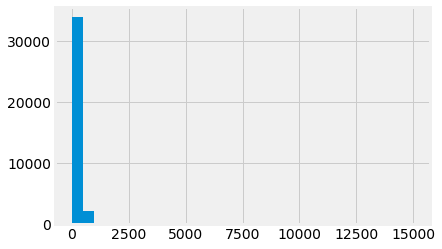

In [10]:
airbnb.price.hist(bins=30);

In [11]:
airbnb[['price']][airbnb.price == 0]

,price
16281,0
17385,0
18682,0
18752,0
18882,0
19733,0
20008,0
28144,0
28462,0


###### Let's cosider only a subset of data

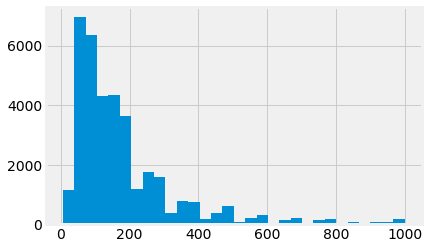

In [12]:
airbnb_ = airbnb[(airbnb.price > 0) & (airbnb.price < 1000)].copy()
airbnb_.price.hist(bins=30);

Even though we are only considering a subset of data some prices are still much higher than others, leading to a non-ideal long-tail distribution. We can apply a **natural log transformation** to normalise our data.

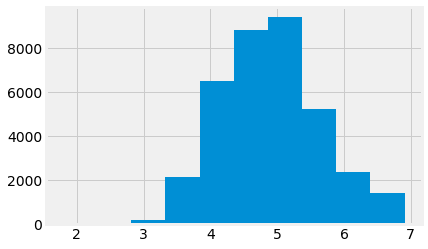

In [13]:
airbnb_['log_price'] = np.log(airbnb_.price)
airbnb_.log_price.hist();

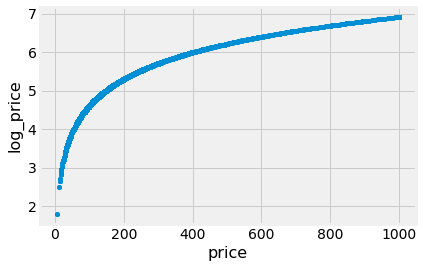

In [14]:
airbnb_.plot(x='price', y='log_price', kind='scatter');

###### Transform categorical variable `room_type`

In [15]:
airbnb_.room_type.value_counts()

Entire home/apt    22395
Private room       13089
Shared room          628
Name: room_type, dtype: int64

In [16]:
room_dummies = pd.get_dummies(airbnb_.room_type, prefix='', prefix_sep='', drop_first=True)
room_dummies.columns = ['private_room', 'shared_room']
room_dummies.head()

,private_room,shared_room
0,1,0
1,0,0
2,1,0
3,0,0
4,1,0


In [17]:
airbnb_ = pd.concat([airbnb_, room_dummies], axis=1)
airbnb_.drop('room_type', axis=1, inplace=True)
airbnb_.head()

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,availability_365,price,log_price,private_room,shared_room
0,Sydney,-33.865153,151.191896,2,493,4.83,187,100,4.605170,1,0
1,Manly,-33.800929,151.261722,5,1,0.03,321,471,6.154858,0,0
2,Sydney,-33.880455,151.216541,2,300,3.63,316,109,4.691348,1,0
3,Leichhardt,-33.859072,151.172753,7,15,0.18,69,450,6.109248,0,0
4,Woollahra,-33.889087,151.259404,1,42,0.45,140,62,4.127134,1,0


###### Explore relationships between the features

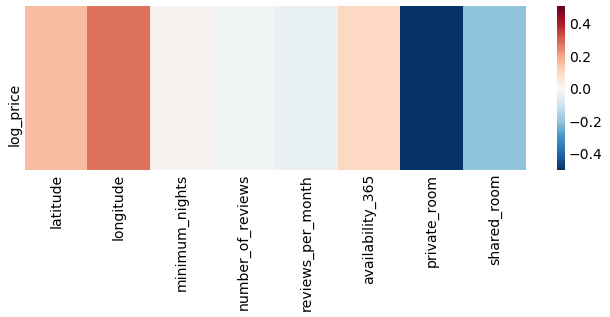

In [18]:
correlations = airbnb_.corr()

plt.rcParams['figure.figsize'] = (10, 3)

sns.heatmap(correlations[['log_price']].drop(['price','log_price']).T, 
            vmin=-0.5, vmax=0.5, 
            cmap=sns.color_palette("RdBu_r", 100));

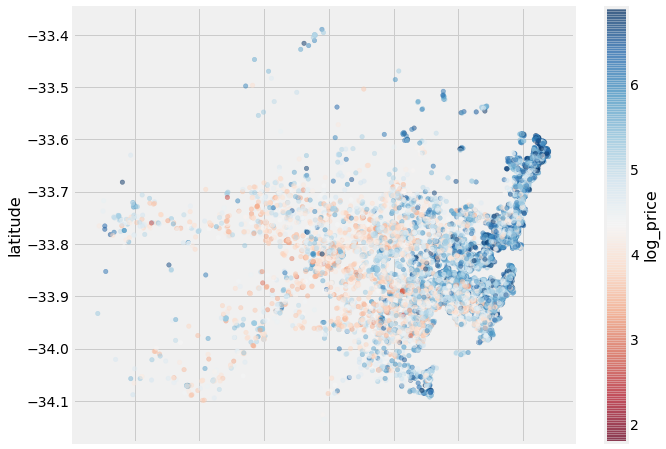

In [20]:
airbnb_.plot(x='longitude', y='latitude', kind='scatter', 
             c='log_price', colormap='RdBu', 
             alpha=0.5, figsize=(10,8));

plt.savefig('./assets/latitude-longitude.png', bbox_inches='tight');

### Group Exercise
- We want to build a model that predicts the price of **future listings** based on location.
- We are going to "segment" the feature space into regions, and then use the **mean price in each region** as the predicted price for future listings.
- Intuitively, you want to **maximise** the similarity (or "homogeneity") within a given region, and **minimise** the similarity between different regions.

**Rules for Segmenting**

- You can only use **straight lines** that are drawn one at a time.
- Your line must either be **vertical or horizontal**.
- Your line **stops** when it hits an existing line.

The defined regions are used to make predictions for out-of-sample data. Thus, there are only four possible predictions! (Is this different from how linear regression makes predictions?)

###### Define the feature map and fit the Decision Tree Regressor model 

In [21]:
# Define X and y.
feature_cols = ['private_room', 'shared_room','latitude', 'longitude', 'reviews_per_month']

X = airbnb_[feature_cols]
y = airbnb_.log_price

In [22]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=1)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [23]:
from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_reg, filled=True, rounded=True,
                           feature_names=feature_cols,
                           out_file=None
)

graph = graph_from_dot_data(dot_data) 
graph.write_png('./assets/tree_airbnb.png') 

ModuleNotFoundError: No module named 'pydotplus'

![](./assets/tree_airbnb.png)

**What does this tree tell you about your data?**

- Room type is the most important factor determining price.
- For a private room in the east, listings in Manly are more expensive than in the Eastern Suburbs.
- For a private room in CBD or in the west the number of reviews per month is an important factor.
- Prices on both shared rooms and entire apartments are largely determined by location.

**Question:** What do you like and dislike about decision trees so far?

In [ ]:
## pd.factorize(entire:0 private:2 shared:3)

In [24]:
# Compute the feature importances (the Gini index at each node).

pd.DataFrame({'feature':feature_cols, 'importance':tree_reg.feature_importances_})\
.sort_values(by='importance', ascending=False)

,feature,importance
0,private_room,0.776486
1,shared_room,0.149675
3,longitude,0.064599
2,latitude,0.006579
4,reviews_per_month,0.002660


<a id="by-hand"></a>
## Choosing the Ideal Cutpoint for a Given Feature

### Exercise: Building a Regression Tree by Hand

Your **training data** is a tiny data set of [used vehicle sale prices](./data/vehicles_train.csv). Your goal is to **predict price** for testing data.

1. Read the data into a Pandas DataFrame.
2. Explore the data by sorting, plotting, or performing split-apply-combine (a.k.a. `groupby`).
3. Decide which feature is the most important predictor, and use that to create your first splitting rule.
    - Only binary splits are allowed.
4. After making your first split, split your DataFrame into two parts and then explore each part to figure out what other splits to make.
5. Stop making splits once you are convinced that it strikes a good balance between underfitting and overfitting.
    - Your goal is to build a model that generalises well.
    - You are allowed to split on the same variable multiple times.
6. Draw your tree, labeling the leaves with the mean price for the observations in that region.
    - Make sure nothing is backwards: You follow the **left branch** if the rule is true and the **right branch** if the rule is false.

In [27]:
# Vehicle training data
path = './data/vehicles_train.csv'
train = pd.read_csv(path)
train

,price,year,miles,doors,vtype
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car
5,4000,2006,124000,2,car
6,3000,2004,177000,4,car
7,2000,2004,209000,4,truck
8,3000,2003,138000,2,car
9,1900,2003,160000,4,car


In [34]:
train.corr()


,price,year,miles,doors
price,1.000000,0.857869,-0.846418,-0.191367
year,0.857869,1.000000,-0.645572,-0.131822
miles,-0.846418,-0.645572,1.000000,0.068225
doors,-0.191367,-0.131822,0.068225,1.000000


In [35]:
train.describe()

,price,year,miles,doors
count,14.000000,14.000000,14.000000,14.000000
mean,6571.428571,2004.857143,114464.285714,3.142857
std,6161.097376,4.382784,63198.242516,1.027105
min,1300.000000,1997.000000,13000.000000,2.000000
25%,2125.000000,2003.000000,64875.000000,2.000000
50%,3500.000000,2004.000000,131000.000000,4.000000
75%,9375.000000,2008.500000,162250.000000,4.000000
max,22000.000000,2012.000000,209000.000000,4.000000


In [38]:
train_new = train[train.year>2007]

train_old = train[train.year <= 2007]

train_new_48000
train_new_less

train_old_140000
train_old_less

NameError: name 'train_old_50000' is not defined

In [42]:
train_old.mean()

price      3350.0
year       2002.7
miles    140800.0
doors         3.2
dtype: float64

<a id="computer-build"></a>
### How Does a Computer Build a Regression Tree?

**Ideal approach:** Considering every possible partition of the feature space (computationally infeasible).

**"Good enough" approach:** Recursive binary splitting.

1. Begin at the top of the tree.
2. For **every feature**, examine **every possible cutpoint**, and choose the feature and cutpoint so that the resulting tree has the lowest possible mean squared error (MSE). Make that split.
3. Examine the two resulting regions. Once again, make a **single split** (in one of the regions) to minimize the MSE.
4. Keep repeating Step 3 until a **stopping criterion** is met:
    - Maximum tree depth (maximum number of splits required to arrive at a leaf).
    - Minimum number of observations in a leaf.

---

This is a **greedy algorithm** because it makes locally optimal decisions -- it takes the best split at each step. A greedy algorithm hopes that a series of locally optimal decisions might be optimal overall; however, this is not always the case. For example:

- Always eating cookies to maximise your immediate happiness (greedy) might not lead to optimal overall happiness.

- In our case, reorganising parts of the tree already constructed based on future splits might result in a better model overall. 

In [43]:
# Before splitting anything, just predict the mean of the entire data set.
train['prediction'] = train.price.mean()
train

,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,car,6571.428571
1,14000,2010,30000,2,car,6571.428571
2,13000,2010,73500,4,car,6571.428571
3,9500,2009,78000,4,car,6571.428571
4,9000,2007,47000,4,car,6571.428571
5,4000,2006,124000,2,car,6571.428571
6,3000,2004,177000,4,car,6571.428571
7,2000,2004,209000,4,truck,6571.428571
8,3000,2003,138000,2,car,6571.428571
9,1900,2003,160000,4,car,6571.428571


In [194]:
# Calculate RMSE for those predictions.
from sklearn import metrics

np.sqrt(metrics.mean_squared_error(train.price, train.prediction))

5936.981985995983

In [195]:
# Define a function that calculates the RMSE for a given split of miles.
def mileage_split(miles):
    lower_mileage_price = train[train.miles < miles].price.mean()
    higher_mileage_price = train[train.miles >= miles].price.mean()
    train['prediction'] = np.where(train.miles < miles, lower_mileage_price, higher_mileage_price)
    return np.sqrt(metrics.mean_squared_error(train.price, train.prediction))

In [202]:
# Calculate RMSE for tree that splits on miles < 50,000.
print('RMSE:', mileage_split(50000))
train

RMSE: 3984.0917425414564


,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,car,15000.000000
1,14000,2010,30000,2,car,15000.000000
2,13000,2010,73500,4,car,4272.727273
3,9500,2009,78000,4,car,4272.727273
4,9000,2007,47000,4,car,15000.000000
5,4000,2006,124000,2,car,4272.727273
6,3000,2004,177000,4,car,4272.727273
7,2000,2004,209000,4,truck,4272.727273
8,3000,2003,138000,2,car,4272.727273
9,1900,2003,160000,4,car,4272.727273


In [200]:
# Calculate RMSE for tree that splits on miles < 100,000.
print('RMSE:', mileage_split(100000))

RMSE: 3530.146530076269


In [206]:
# Check all possible mileage splits.
mileage_range = list(range(train.miles.min(), train.miles.max(), 1000))
print(mileage_range)

[13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000, 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000, 116000, 117000, 118000, 119000, 120000, 121000, 122000, 123000, 124000, 125000, 126000, 127000, 128000, 129000, 130000, 131000, 132000, 133000, 134000, 135000, 136000, 137000, 138000, 139000, 140000, 141000, 142000, 143000, 144000, 145000, 146000, 147000, 148000

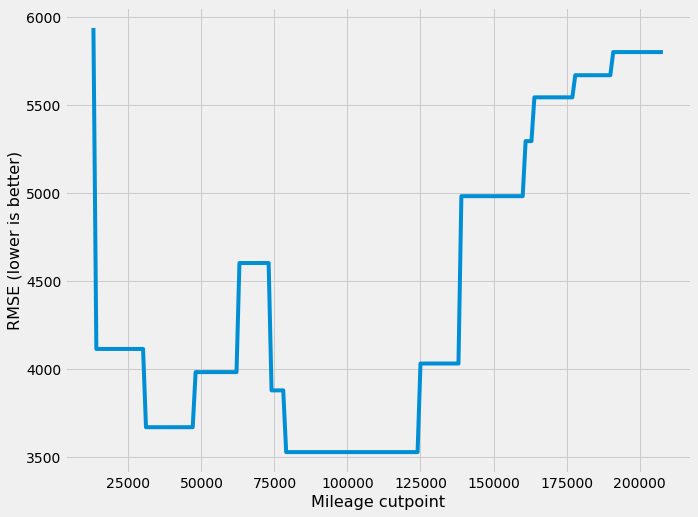

In [208]:
RMSE = [mileage_split(miles) for miles in mileage_range]

# Plot mileage cutpoint (x-axis) versus RMSE (y-axis).
plt.rcParams['figure.figsize'] = (10, 8)
plt.plot(mileage_range, RMSE);
plt.xlabel('Mileage cutpoint');
plt.ylabel('RMSE (lower is better)');

**Recap:** Before every split, we repeat this process for every feature and choose the feature and cutpoint that produce the lowest MSE.

<a id="sklearn-tree"></a>
## Building a Regression Tree in `scikit-learn`

###### Transform categorical variable `vtype` by encoding `car` as 0 and `truck` as 1.

In [44]:
train['vtype'] = train.vtype.map({'car':0, 'truck':1})

In [45]:
# Define X and y.
feature_cols = ['year', 'miles', 'doors', 'vtype']

X = train[feature_cols]
y = train.price

In [46]:
# Instantiate a DecisionTreeRegressor (with random_state=1).
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=1)
tree_reg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

###### Let's use [leave-one-out cross-validation (LOOCV)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to estimate the RMSE for this model. 
> Why is parameter `cv` set to 14?

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

#what does cv mean?


3107.1428571428573

<a id="#tuning-tree"></a>
## Tuning a Regression Tree

What happens if we grow a tree too deep? The **training error** will continue to go down as the tree size increases (due to overfitting), but the lowest **cross-validation error** occurs for a tree with lower leaves. 

Note that if we make a **complete tree** (where every data point is boxed into its own region), then we will achieve perfect training accuracy. However, then outliers in the training data will greatly affect the model.

![](./assets/tree_depth_error.png)

Let's try to reduce the RMSE by tuning the **max_depth** parameter:

In [48]:
# Try different values one by one.
tree_reg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(tree_reg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4050.1443001443

Or, we could write a loop to try a range of values:

In [216]:
# List of values to try:
max_depth_range = list(range(1, 8))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use LOOCV with each value of max_depth.
for depth in max_depth_range:
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(tree_reg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

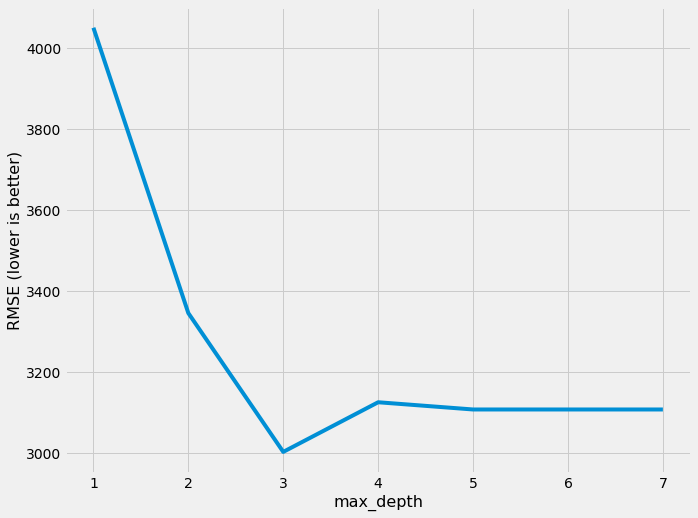

In [217]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [218]:
# max_depth=3 was best, so fit a tree using that parameter.
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=1)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [220]:
# "Gini importance" of each feature: the (normalised) total reduction of error brought by that feature.
pd.DataFrame({'feature':feature_cols, 'importance':tree_reg.feature_importances_})

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,vtype,0.000000


<a id="testing-preds"></a>
## Making Predictions for the Testing Data

In [221]:
# Read the testing data.
path = './data/vehicles_test.csv'

test = pd.read_csv(path)
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


**Question:** Using the tree diagram above, what predictions will the model make for each observation?

In [223]:
# Use fitted model to make predictions on testing data.
X_test = test[feature_cols]
y_test = test.price
y_pred = tree_reg.predict(X_test)

y_pred

array([ 4000.,  5000., 13500.])

In [224]:
# Calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1190.2380714238084

<a id="part-three"></a>
## Summary: Comparing Decision Trees With Other Models

**Advantages of decision trees:**

- They can be used for regression or classification.
- They can be displayed graphically.
- They are highly interpretable.
- They can be specified as a series of rules, and more closely approximate human decision-making than other models.
- Prediction is fast.
- Their features don't need scaling.
- They authomatically learn feature interactions.
- Tends to ignore irrelevant features.
- They are non-parametric (i.e. will outperform linear models if the relationship between features and response is highly non-linear).

**Disadvantages of decision trees:**

- Their performance is (generally) not competitive with the best supervised learning methods.
- They can easily overfit the training data (tuning is required).
- Small variations in the data can result in a completely different tree (high variance).
- Recursive binary splitting makes "locally optimal" decisions that may not result in a globally optimal tree.
- They don't tend to work well if the classes are highly unbalanced.
- They don't tend to work well with very small data sets.

** Trees versus linear models**
![Trees versus linear models](assets/tree_vs_linear.png)

In [ ]:
# if interested look at suport vector machiens